In [1]:
pip install contextily

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline

import pandas as pd
from datetime import datetime
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib
from shapely.geometry import Point
from adjustText import adjust_text



In [3]:
tiles = pd.read_parquet('/Users/sathish/aws/output2.parquet')

In [46]:
tiles.dtypes

quadkey         object
tile          geometry
avg_d_kbps       int64
avg_u_kbps       int64
avg_lat_ms       int64
tests            int64
devices          int64
dtype: object

In [4]:
from shapely import wkt

tiles['tile'] = gp.GeoSeries.from_wkt(tiles['tile'])

In [5]:
geoDataFrame = gp.GeoDataFrame(tiles, geometry='tile')

In [6]:
geoDataFrame.set_crs('epsg:3857')

,quadkey,tile,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices
0,1322033110323033,"POLYGON ((100.783 13.609, 100.789 13.609, 100....",34134,19585,21,150,55
1,3100103010200101,"POLYGON ((104.793 -2.987, 104.799 -2.987, 104....",12566,6215,33,21,13
2,1202310022300211,"POLYGON ((17.067 48.093, 17.073 48.093, 17.073...",78967,15661,16,3,2
3,1202303220333332,"POLYGON ((14.403 45.341, 14.409 45.341, 14.409...",79228,21851,21,42,27
4,1231210130113111,"POLYGON ((75.580 31.316, 75.586 31.316, 75.586...",26073,10918,29,42,25
...,...,...,...,...,...,...,...
4197849,1202210333322120,"POLYGON ((8.284 47.063, 8.289 47.063, 8.289 47...",346878,4242,18,1,1
4197850,1202031001132022,"POLYGON ((9.053 52.392, 9.058 52.392, 9.058 52...",53474,1948,27,1,1
4197851,0231311130303002,"POLYGON ((-90.483 31.161, -90.478 31.161, -90....",14177,103,52,1,1
4197852,0302303210302202,"POLYGON ((-75.059 45.901, -75.053 45.901, -75....",5996,1121,45,1,1


In [7]:
worldCountries = gp.read_file("zip:///Users/sathish/Code/Research Project/Simulation/world-administrative-boundaries.zip")

In [8]:
geoWorldCountries = gp.GeoDataFrame(worldCountries, geometry='geometry')

In [9]:
geoWorldCountries

,status,color_code,region,iso3,continent,name,iso_3166_1_,french_shor,geometry
0,Member State,SMR,Southern Europe,SMR,Europe,San Marino,SM,Saint-Marin,"POLYGON ((12.40913 43.90842, 12.40352 43.92092..."
1,Member State,SYR,Western Asia,SYR,Asia,Syrian Arab Republic,SY,RÃ©publique arabe syrienne,"POLYGON ((42.35562 37.10693, 42.37833 37.07206..."
2,Member State,LVA,Northern Europe,LVA,Europe,Latvia,LV,Lettonie,"POLYGON ((27.37206 57.53564, 27.42500 57.53194..."
3,Member State,CPV,Western Africa,CPV,Africa,Cape Verde,CV,Cabo Verde,"MULTIPOLYGON (((-24.36556 14.81292, -24.39000 ..."
4,Member State,ZMB,Eastern Africa,ZMB,Africa,Zambia,ZM,Zambie,"POLYGON ((32.94040 -9.40508, 32.93944 -9.41583..."
...,...,...,...,...,...,...,...,...,...
251,FR Territory,FRA,Caribbean,MTQ,Americas,Martinique,MQ,Martinique,"POLYGON ((-60.81695 14.47333, -60.82056 14.455..."
252,Member State,MYS,South-Eastern Asia,MYS,Asia,Malaysia,MY,Malaisie,"MULTIPOLYGON (((111.41152 2.37639, 111.36804 2..."
253,Member State,KEN,Eastern Africa,KEN,Africa,Kenya,KE,Kenya,"MULTIPOLYGON (((41.13805 -2.12444, 41.09416 -2..."
254,PT Territory,PRT,Southern Europe,None,Europe,Madeira Islands,None,Madeira Islands,"POLYGON ((-17.10250 32.82333, -17.05306 32.809..."


In [10]:
joinGeoWorldCountries = geoDataFrame.sjoin(geoWorldCountries, how="left", predicate='intersects')

/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1938: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


In [11]:
joinGeoWorldCountries[joinGeoWorldCountries['name'].isin(['India'])]

,quadkey,tile,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_right,status,color_code,region,iso3,continent,name,iso_3166_1_,french_shor
4,1231210130113111,"POLYGON ((75.58044 31.31610, 75.58594 31.31610...",26073,10918,29,42,25,226.0,Member State,IND,Southern Asia,IND,Asia,India,IN,Inde
9,1233032122111021,"POLYGON ((74.84436 12.88678, 74.84985 12.88678...",16728,4489,47,47,28,226.0,Member State,IND,Southern Asia,IND,Asia,India,IN,Inde
27,1320220333111112,"POLYGON ((92.80151 24.84158, 92.80701 24.84158...",10828,9074,146,72,19,226.0,Member State,IND,Southern Asia,IND,Asia,India,IN,Inde
28,1231211013012210,"POLYGON ((77.09106 31.59725, 77.09656 31.59725...",23229,4026,32,3,1,226.0,Member State,IND,Southern Asia,IND,Asia,India,IN,Inde
31,1231231110210112,"POLYGON ((78.16772 26.89758, 78.17322 26.89758...",17454,9551,47,250,19,226.0,Member State,IND,Southern Asia,IND,Asia,India,IN,Inde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197797,1231330221230300,"POLYGON ((84.83643 24.90637, 84.84192 24.90637...",21312,8019,16,1,1,226.0,Member State,IND,Southern Asia,IND,Asia,India,IN,Inde
4197807,1231302002220213,"POLYGON ((78.76648 28.97451, 78.77197 28.97451...",20502,5587,16,1,1,226.0,Member State,IND,Southern Asia,IND,Asia,India,IN,Inde
4197818,1231211200312213,"POLYGON ((76.21765 30.53861, 76.22314 30.53861...",1062,9628,27,1,1,226.0,Member State,IND,Southern Asia,IND,Asia,India,IN,Inde
4197829,1231231001013103,"POLYGON ((76.44836 27.01509, 76.45386 27.01509...",3256,115,41,1,1,226.0,Member State,IND,Southern Asia,IND,Asia,India,IN,Inde


In [12]:
joinGeoWorldCountries['avg_d_mbps'] = joinGeoWorldCountries['avg_d_kbps'] / 1000
joinGeoWorldCountries['avg_u_mbps'] = joinGeoWorldCountries['avg_u_kbps'] / 1000

In [13]:
county_stats = (
    joinGeoWorldCountries.groupby(["name"])
    .apply(
        lambda x: pd.Series(
            {"avg_d_mbps_wt": np.average(x["avg_d_mbps"], weights=x["tests"]),"avg_u_mbps_wt": np.average(x["avg_u_mbps"], weights=x["tests"])}
        )
    )
    .reset_index()
    .merge(
        joinGeoWorldCountries.groupby(["name"])
        .agg(tests=("tests", "sum"))
        .reset_index(),
        on=["name"],
    )
)

In [14]:
county_stats.sort_values(by=['tests'],ascending=False).head(5)

,name,avg_d_mbps_wt,avg_u_mbps_wt,tests
97,India,12.967881,5.563988,5492128
220,United States of America,75.898782,15.394886,3140723
43,China,206.796738,37.962229,1921009
98,Indonesia,16.369689,11.834148,1864908
174,Russian Federation,22.640738,10.614243,1657962
202,Taiwan,73.823973,19.572281,1436156
128,Malaysia,24.282612,12.250993,1427545
104,Italy,38.892085,12.126197,1378852
204,Thailand,44.938674,17.081706,1193156
29,Brazil,27.437210,10.519367,867869


In [15]:
county_stats.sort_values(by=['tests'],ascending=False).head(1)

,name,avg_d_mbps_wt,avg_u_mbps_wt,tests
97,India,12.967881,5.563988,5492128


<AxesSubplot:>

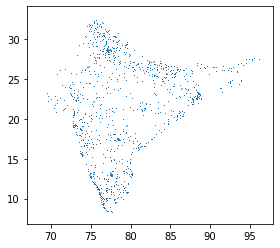

In [16]:
joinGeoWorldCountries[joinGeoWorldCountries['name'].isin(['India'])]['tile'].plot()

In [17]:
shapeTest = joinGeoWorldCountries

In [18]:
shapeTest

,quadkey,tile,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_right,status,color_code,region,iso3,continent,name,iso_3166_1_,french_shor,avg_d_mbps,avg_u_mbps
0,1322033110323033,"POLYGON ((100.78308 13.60862, 100.78857 13.608...",34134,19585,21,150,55,124.0,Member State,THA,South-Eastern Asia,THA,Asia,Thailand,TH,ThaÃ¯lande,34.134,19.585
1,3100103010200101,"POLYGON ((104.79309 -2.98693, 104.79858 -2.986...",12566,6215,33,21,13,20.0,Member State,IDN,South-Eastern Asia,IDN,Asia,Indonesia,ID,IndonÃ©sie,12.566,6.215
2,1202310022300211,"POLYGON ((17.06726 48.09276, 17.07275 48.09276...",78967,15661,16,3,2,149.0,Member State,AUT,Western Europe,AUT,Europe,Austria,AT,Autriche,78.967,15.661
3,1202303220333332,"POLYGON ((14.40308 45.34056, 14.40857 45.34056...",79228,21851,21,42,27,90.0,Member State,HRV,Southern Europe,HRV,Europe,Croatia,HR,Croatie,79.228,21.851
4,1231210130113111,"POLYGON ((75.58044 31.31610, 75.58594 31.31610...",26073,10918,29,42,25,226.0,Member State,IND,Southern Asia,IND,Asia,India,IN,Inde,26.073,10.918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197849,1202210333322120,"POLYGON ((8.28369 47.06264, 8.28918 47.06264, ...",346878,4242,18,1,1,147.0,Member State,CHE,Western Europe,CHE,Europe,Switzerland,CH,Suisse,346.878,4.242
4197850,1202031001132022,"POLYGON ((9.05273 52.39236, 9.05823 52.39236, ...",53474,1948,27,1,1,230.0,Member State,DEU,Western Europe,DEU,Europe,Germany,DE,Allemagne,53.474,1.948
4197851,0231311130303002,"POLYGON ((-90.48340 31.16111, -90.47791 31.161...",14177,103,52,1,1,166.0,Member State,USA,Northern America,USA,Americas,United States of America,US,Ãtats-Unis d'AmÃ©rique,14.177,0.103
4197852,0302303210302202,"POLYGON ((-75.05859 45.90148, -75.05310 45.901...",5996,1121,45,1,1,56.0,Member State,CAN,Northern America,CAN,Americas,Canada,CA,Canada,5.996,1.121


In [19]:
shapeTest = shapeTest.drop(shapeTest.columns[[0,2,3,7,8,9,10,11,12,14,15]],axis=1)

In [20]:
shapeTest

,tile,avg_lat_ms,tests,devices,name,avg_d_mbps,avg_u_mbps
0,"POLYGON ((100.78308 13.60862, 100.78857 13.608...",21,150,55,Thailand,34.134,19.585
1,"POLYGON ((104.79309 -2.98693, 104.79858 -2.986...",33,21,13,Indonesia,12.566,6.215
2,"POLYGON ((17.06726 48.09276, 17.07275 48.09276...",16,3,2,Austria,78.967,15.661
3,"POLYGON ((14.40308 45.34056, 14.40857 45.34056...",21,42,27,Croatia,79.228,21.851
4,"POLYGON ((75.58044 31.31610, 75.58594 31.31610...",29,42,25,India,26.073,10.918
...,...,...,...,...,...,...,...
4197849,"POLYGON ((8.28369 47.06264, 8.28918 47.06264, ...",18,1,1,Switzerland,346.878,4.242
4197850,"POLYGON ((9.05273 52.39236, 9.05823 52.39236, ...",27,1,1,Germany,53.474,1.948
4197851,"POLYGON ((-90.48340 31.16111, -90.47791 31.161...",52,1,1,United States of America,14.177,0.103
4197852,"POLYGON ((-75.05859 45.90148, -75.05310 45.901...",45,1,1,Canada,5.996,1.121


In [45]:
indiaBoundaryJoined.dtypes

index            int64
tile          geometry
avg_lat_ms       int64
tests            int64
devices          int64
name            object
avg_d_mbps     float64
avg_u_mbps     float64
distance       float64
dtype: object

In [21]:
indiaBoundaryJoined = shapeTest[shapeTest['name'].isin(['India'])]
indiaBoundaryJoined=indiaBoundaryJoined.reset_index()
indiaBoundaryJoined

,index,tile,avg_lat_ms,tests,devices,name,avg_d_mbps,avg_u_mbps
0,4,"POLYGON ((75.58044 31.31610, 75.58594 31.31610...",29,42,25,India,26.073,10.918
1,9,"POLYGON ((74.84436 12.88678, 74.84985 12.88678...",47,47,28,India,16.728,4.489
2,27,"POLYGON ((92.80151 24.84158, 92.80701 24.84158...",146,72,19,India,10.828,9.074
3,28,"POLYGON ((77.09106 31.59725, 77.09656 31.59725...",32,3,1,India,23.229,4.026
4,31,"POLYGON ((78.16772 26.89758, 78.17322 26.89758...",47,250,19,India,17.454,9.551
...,...,...,...,...,...,...,...,...
502208,4197797,"POLYGON ((84.83643 24.90637, 84.84192 24.90637...",16,1,1,India,21.312,8.019
502209,4197807,"POLYGON ((78.76648 28.97451, 78.77197 28.97451...",16,1,1,India,20.502,5.587
502210,4197818,"POLYGON ((76.21765 30.53861, 76.22314 30.53861...",27,1,1,India,1.062,9.628
502211,4197829,"POLYGON ((76.44836 27.01509, 76.45386 27.01509...",41,1,1,India,3.256,0.115


<AxesSubplot:>

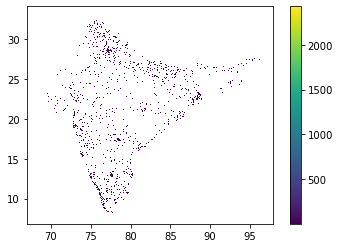

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

indiaBoundaryJoined.plot(column='tests', ax=ax, legend=True)

In [23]:
indianTilesBounds=indiaBoundaryJoined['tile'].bounds

In [24]:
indianTilesBounds

,minx,miny,maxx,maxy
0,75.580444,31.311408,75.585938,31.316101
1,74.844360,12.881425,74.849854,12.886780
2,92.801514,24.836596,92.807007,24.841581
3,77.091064,31.592574,77.096558,31.597253
4,78.167725,26.892679,78.173218,26.897578
...,...,...,...,...
502208,84.836426,24.901385,84.841919,24.906367
502209,78.766479,28.969701,78.771973,28.974507
502210,76.217651,30.533877,76.223145,30.538608
502211,76.448364,27.010196,76.453857,27.015090


In [25]:
min_x=indianTilesBounds['minx'].min()
min_y=indianTilesBounds['miny'].min()
max_x=indianTilesBounds['maxx'].max()
max_y=indianTilesBounds['maxy'].max()

In [26]:
print(min_x)
print(min_y)
print(max_x)
print(max_y)

68.3843994140625
8.07554603328031
96.4984130859375
32.9164853473144


In [27]:
indianBoundary = geoWorldCountries.loc[geoWorldCountries["name"].isin(['India'])]

In [28]:
import random
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
#Defining the randomization generator
def polygon_random_points (poly, num_points):
#     min_x, min_y, max_x, max_y = poly.bounds
#     print(min_x)
    points = gp.GeoDataFrame()
    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        geometry = [Point(random_point.x,random_point.y)]    
        geo_df = gp.GeoDataFrame(geometry = geometry,crs=4326)
        points_within = geo_df.sjoin(indianBoundary, how="left", predicate='intersects')
        print(points_within)
        status = points_within['name'].isna().bool()
#         print(status)
        if (status==False):
            points=geo_df
            break;
    return points

In [29]:
pip install sortedcontainers

Note: you may need to restart the kernel to use updated packages.


In [30]:
from sortedcontainers import SortedList
sortedList = SortedList()

In [31]:
def sortedNearedPolygons(data):
    distance=polygon.distance(data)
    sortedList.add(distance)
    return distance

                    geometry  index_right status color_code region iso3  \
0  POINT (69.00794 17.95880)          NaN    NaN        NaN    NaN  NaN   

  continent name iso_3166_1_ french_shor  
0       NaN  NaN         NaN         NaN  
                    geometry  index_right status color_code region iso3  \
0  POINT (85.97081 18.34639)          NaN    NaN        NaN    NaN  NaN   

  continent name iso_3166_1_ french_shor  
0       NaN  NaN         NaN         NaN  
                    geometry  index_right        status color_code  \
0  POINT (71.20865 24.96793)          226  Member State        IND   

          region iso3 continent   name iso_3166_1_ french_shor  
0  Southern Asia  IND      Asia  India          IN        Inde  


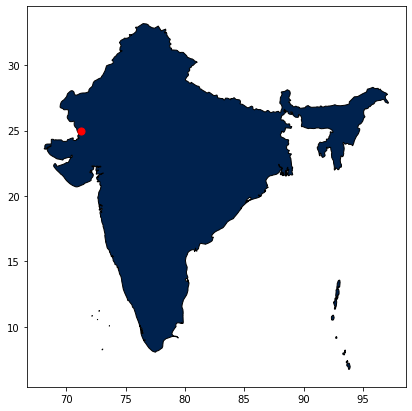

In [32]:
for i in range(1):
    points = polygon_random_points(indianBoundary,1)
    fig, ax = plt.subplots(figsize=(7,7))

    indianBoundary.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=1,cmap="cividis")
    points.plot(ax=ax, color='red', markersize=50)

# locIndex = shapeTest[shapeTest['name'].isin(['India'])].distance(points)
# print(locIndex)

# shapeTest[shapeTest['name'].isin(['India'])].iloc[[locIndex]]

# df1 = points.to_crs(epsg=3857)
# df2 = shapeTest[shapeTest['name'].isin(['India'])].to_crs(epsg=3857)

point = points.geometry
polygon = indiaBoundaryJoined.geometry

out = point.apply(lambda p: polygon.distance(p))

# print(out.idxmin(axis=1))

# print(indiaBoundaryJoined.iloc[[out.idxmin(axis=1)]])

# print(out.min(axis=1))

In [33]:
# locIndex = indiaBoundaryJoined.distance(points)
# print(locIndex)

In [34]:
# shapeTest[indiaBoundaryJoined].iloc[[locIndex]]

In [35]:
# print(indiaBoundaryJoined.iloc[locIndex])

# fig, ax = plt.subplots(figsize=(7,7))

# indianBoundary.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=1,cmap="cividis")


# shapeTest[indiaBoundaryJoined].iloc[[locIndex]].plot(ax=ax,color='yellow', markersize=5000)

In [36]:
out

,0,1,2,3,4,5,6,7,8,9,...,502203,502204,502205,502206,502207,502208,502209,502210,502211,502212
0,7.704046,12.616362,21.593235,8.859386,7.220346,8.948716,10.478407,6.549516,17.060786,18.134591,...,17.112571,4.949265,15.532472,12.712873,7.046074,13.627916,8.551899,7.487982,5.623653,17.063528


In [37]:
indiaBoundaryJoined['distance']=out.T

In [38]:
indiaBoundaryJoined

,index,tile,avg_lat_ms,tests,devices,name,avg_d_mbps,avg_u_mbps,distance
0,4,"POLYGON ((75.58044 31.31610, 75.58594 31.31610...",29,42,25,India,26.073,10.918,7.704046
1,9,"POLYGON ((74.84436 12.88678, 74.84985 12.88678...",47,47,28,India,16.728,4.489,12.616362
2,27,"POLYGON ((92.80151 24.84158, 92.80701 24.84158...",146,72,19,India,10.828,9.074,21.593235
3,28,"POLYGON ((77.09106 31.59725, 77.09656 31.59725...",32,3,1,India,23.229,4.026,8.859386
4,31,"POLYGON ((78.16772 26.89758, 78.17322 26.89758...",47,250,19,India,17.454,9.551,7.220346
...,...,...,...,...,...,...,...,...,...
502208,4197797,"POLYGON ((84.83643 24.90637, 84.84192 24.90637...",16,1,1,India,21.312,8.019,13.627916
502209,4197807,"POLYGON ((78.76648 28.97451, 78.77197 28.97451...",16,1,1,India,20.502,5.587,8.551899
502210,4197818,"POLYGON ((76.21765 30.53861, 76.22314 30.53861...",27,1,1,India,1.062,9.628,7.487982
502211,4197829,"POLYGON ((76.44836 27.01509, 76.45386 27.01509...",41,1,1,India,3.256,0.115,5.623653


In [39]:
# distance unit is 1.000000 = 1000 KM, we used https://www.omnicalculator.com/other/latitude-longitude-distance for caclulating the distance
indiaBoundaryJoined = indiaBoundaryJoined.sort_values('distance')

In [40]:
# get 10,000 devices basedon shortest distance
# add the random point to the dataset
# generate for 100 record
# export to CSV
# indiaBoundaryJoined.append({'Point':points.geometry}, ignore_index=True)
# points = points.reset_index(drop=True,inplace=True)
points

,geometry
0,POINT (71.20865 24.96793)


In [ ]:
output = pd.DataFrame()
for i in range(1):
    points = polygon_random_points(indianBoundary,1)
    point = points.geometry
    polygon = indiaBoundaryJoined.geometry
    out = point.apply(lambda p: polygon.distance(p))
    indiaBoundaryJoined['distance']=out.T
    output=output.append({'Point':points.geometry}, ignore_index=True)
    output=indiaBoundaryJoined[indiaBoundaryJoined['distance']<=1]
    
output.to_csv('output/output1.csv')

In [42]:
output

,index,tile,avg_lat_ms,tests,devices,name,avg_d_mbps,avg_u_mbps,distance,Point
0,4016655.0,"POLYGON ((79.90906 22.74579, 79.91455 22.74579...",14.0,1.0,1.0,India,39.060,8.391,0.990743,NaN
1,3084523.0,"POLYGON ((79.90906 22.74072, 79.91455 22.74072...",23.0,3.0,2.0,India,21.188,4.975,0.988944,NaN
2,2368731.0,"POLYGON ((79.85962 22.55315, 79.86511 22.55315...",65.0,4.0,2.0,India,1.840,0.168,0.988003,NaN
3,313202.0,"POLYGON ((79.91455 22.74072, 79.92004 22.74072...",25.0,7.0,2.0,India,26.322,5.977,0.983806,NaN
4,335057.0,"POLYGON ((79.92554 22.74072, 79.93103 22.74072...",29.0,4.0,3.0,India,22.243,3.510,0.973542,NaN
...,...,...,...,...,...,...,...,...,...,...
1249,872338.0,"POLYGON ((81.81519 22.24334, 81.82068 22.24334...",46.0,7.0,1.0,India,6.397,4.823,0.985820,NaN
1250,2797844.0,"POLYGON ((81.77673 22.08564, 81.78223 22.08564...",39.0,1.0,1.0,India,51.678,8.521,0.984045,NaN
1251,3079788.0,"POLYGON ((81.82068 22.24334, 81.82617 22.24334...",22.0,1.0,1.0,India,1.835,1.832,0.991255,NaN
1252,1073353.0,"POLYGON ((81.78772 22.10600, 81.79321 22.10600...",55.0,1.0,1.0,India,17.283,3.947,0.988541,NaN


In [43]:
output

,index,tile,avg_lat_ms,tests,devices,name,avg_d_mbps,avg_u_mbps,distance,Point
0,4016655.0,"POLYGON ((79.90906 22.74579, 79.91455 22.74579...",14.0,1.0,1.0,India,39.060,8.391,0.990743,NaN
1,3084523.0,"POLYGON ((79.90906 22.74072, 79.91455 22.74072...",23.0,3.0,2.0,India,21.188,4.975,0.988944,NaN
2,2368731.0,"POLYGON ((79.85962 22.55315, 79.86511 22.55315...",65.0,4.0,2.0,India,1.840,0.168,0.988003,NaN
3,313202.0,"POLYGON ((79.91455 22.74072, 79.92004 22.74072...",25.0,7.0,2.0,India,26.322,5.977,0.983806,NaN
4,335057.0,"POLYGON ((79.92554 22.74072, 79.93103 22.74072...",29.0,4.0,3.0,India,22.243,3.510,0.973542,NaN
...,...,...,...,...,...,...,...,...,...,...
1249,872338.0,"POLYGON ((81.81519 22.24334, 81.82068 22.24334...",46.0,7.0,1.0,India,6.397,4.823,0.985820,NaN
1250,2797844.0,"POLYGON ((81.77673 22.08564, 81.78223 22.08564...",39.0,1.0,1.0,India,51.678,8.521,0.984045,NaN
1251,3079788.0,"POLYGON ((81.82068 22.24334, 81.82617 22.24334...",22.0,1.0,1.0,India,1.835,1.832,0.991255,NaN
1252,1073353.0,"POLYGON ((81.78772 22.10600, 81.79321 22.10600...",55.0,1.0,1.0,India,17.283,3.947,0.988541,NaN
